In [1]:
# Import dependencies 
import pymongo
import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf


# Data pull and pre-processing

In [2]:
# Import Census CSV data 
census_data = pd.read_csv('./Resources/2016_2020_census_data.csv')
census_data

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Year
0,5762,513,39.2,58558,24235.0,50,9.746589,2016
1,5763,2715,43.9,54968,29674.0,488,17.974217,2016
2,5764,3370,41.3,44468,22651.0,323,9.584570,2016
3,5765,1632,46.7,56771,30786.0,85,5.208333,2016
4,5766,598,45.9,52250,33227.0,76,12.709030,2016
...,...,...,...,...,...,...,...,...
66235,16623,552,54.9,51667,26369.0,80,14.492754,2020
66236,16627,2118,44.6,45000,24699.0,324,15.297450,2020
66237,16634,315,46.1,51500,25084.0,24,7.619048,2020
66238,16640,707,48.6,55982,28335.0,167,23.620934,2020


In [3]:
# Perform some data cleansing options Drop NA
census_data.dropna(inplace=True)
census_data

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Year
0,5762,513,39.2,58558,24235.0,50,9.746589,2016
1,5763,2715,43.9,54968,29674.0,488,17.974217,2016
2,5764,3370,41.3,44468,22651.0,323,9.584570,2016
3,5765,1632,46.7,56771,30786.0,85,5.208333,2016
4,5766,598,45.9,52250,33227.0,76,12.709030,2016
...,...,...,...,...,...,...,...,...
66235,16623,552,54.9,51667,26369.0,80,14.492754,2020
66236,16627,2118,44.6,45000,24699.0,324,15.297450,2020
66237,16634,315,46.1,51500,25084.0,24,7.619048,2020
66238,16640,707,48.6,55982,28335.0,167,23.620934,2020


In [4]:
cleaned_census_data = census_data[census_data['Household Income']>0]
cleaned_census_data

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Year
0,5762,513,39.2,58558,24235.0,50,9.746589,2016
1,5763,2715,43.9,54968,29674.0,488,17.974217,2016
2,5764,3370,41.3,44468,22651.0,323,9.584570,2016
3,5765,1632,46.7,56771,30786.0,85,5.208333,2016
4,5766,598,45.9,52250,33227.0,76,12.709030,2016
...,...,...,...,...,...,...,...,...
66235,16623,552,54.9,51667,26369.0,80,14.492754,2020
66236,16627,2118,44.6,45000,24699.0,324,15.297450,2020
66237,16634,315,46.1,51500,25084.0,24,7.619048,2020
66238,16640,707,48.6,55982,28335.0,167,23.620934,2020


In [5]:
# Convert years to time since current 
cleaned_census_data['Years Since'] = cleaned_census_data['Year'].map({2016: 7, 2020: 3})
cleaned_census_data

c:\Users\huntl\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Year,Years Since
0,5762,513,39.2,58558,24235.0,50,9.746589,2016,7
1,5763,2715,43.9,54968,29674.0,488,17.974217,2016,7
2,5764,3370,41.3,44468,22651.0,323,9.584570,2016,7
3,5765,1632,46.7,56771,30786.0,85,5.208333,2016,7
4,5766,598,45.9,52250,33227.0,76,12.709030,2016,7
...,...,...,...,...,...,...,...,...,...
66235,16623,552,54.9,51667,26369.0,80,14.492754,2020,3
66236,16627,2118,44.6,45000,24699.0,324,15.297450,2020,3
66237,16634,315,46.1,51500,25084.0,24,7.619048,2020,3
66238,16640,707,48.6,55982,28335.0,167,23.620934,2020,3


In [6]:
zip_codes = pd.read_csv('./Resources/usazipcode.csv')
zip_codes.columns

Index(['zip', 'Zipcode name', 'City', 'State', 'County Name'], dtype='object')

In [7]:
zip_codes.dropna(inplace=True)
zip_codes['zip'] = zip_codes['zip'].astype(int)
zip_codes.dtypes

zip              int32
Zipcode name    object
City            object
State           object
County Name     object
dtype: object

In [8]:
# Merge the census data and zipcode DF
new_df = pd.merge(cleaned_census_data, zip_codes, how='left', left_on='Zipcode', right_on = 'zip')
new_df.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Year,Years Since,zip,Zipcode name,City,State,County Name
0,5762,513,39.2,58558,24235.0,50,9.746589,2016,7,5762.0,"PITTSFIELD, VT",PITTSFIELD,VT,RUTLAND
1,5763,2715,43.9,54968,29674.0,488,17.974217,2016,7,5763.0,"PITTSFORD, VT",PITTSFORD,VT,RUTLAND
2,5764,3370,41.3,44468,22651.0,323,9.584570,2016,7,5764.0,"POULTNEY, VT",POULTNEY,VT,RUTLAND
3,5765,1632,46.7,56771,30786.0,85,5.208333,2016,7,5765.0,"PROCTOR, VT",PROCTOR,VT,RUTLAND
4,5766,598,45.9,52250,33227.0,76,12.709030,2016,7,5766.0,"RIPTON, VT",RIPTON,VT,ADDISON


In [9]:
# Merge the census and zip data 
census_zip_df = new_df.drop(['zip', 'Zipcode name', 'City', 'County Name'],axis=1)
census_zip_df

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Year,Years Since,State
0,5762,513,39.2,58558,24235.0,50,9.746589,2016,7,VT
1,5763,2715,43.9,54968,29674.0,488,17.974217,2016,7,VT
2,5764,3370,41.3,44468,22651.0,323,9.584570,2016,7,VT
3,5765,1632,46.7,56771,30786.0,85,5.208333,2016,7,VT
4,5766,598,45.9,52250,33227.0,76,12.709030,2016,7,VT
...,...,...,...,...,...,...,...,...,...,...
61665,16623,552,54.9,51667,26369.0,80,14.492754,2020,3,PA
61666,16627,2118,44.6,45000,24699.0,324,15.297450,2020,3,PA
61667,16634,315,46.1,51500,25084.0,24,7.619048,2020,3,PA
61668,16640,707,48.6,55982,28335.0,167,23.620934,2020,3,PA


In [10]:
# Import the winner values by state
election_results = pd.read_csv('./Resources/2016_2020_winners.csv')
election_results

,STATE,Electoral Vote (D),Electoral Vote (R),Popular Vote (D),Popular Vote (R),Popular Vote All Others,Total Vote,Winner,Year
0,AL,NaN,9.0,"849,624","1,441,170","32,488","2,323,282",Republican,2020
1,AK,NaN,3.0,"153,778","189,951","15,801","359,530",Republican,2020
2,AZ,11.0,NaN,"1,672,143","1,661,686","53,497","3,387,326",Democrat,2020
3,AR,NaN,6.0,"423,932","760,647","34,490","1,219,069",Republican,2020
4,CA,55.0,NaN,"11,110,639","6,006,518","384,223","17,501,380",Democrat,2020
...,...,...,...,...,...,...,...,...,...
97,VA,NaN,13.0,"1,769,443","1,981,473","233,715","3,984,631",Republican,2016
98,WA,NaN,8.0,"1,221,747","1,742,718","352,554","3,317,019",Republican,2016
99,WV,5.0,NaN,"489,371","188,794","36,258","714,423",Democrat,2016
100,WI,10.0,NaN,"1,405,284","1,382,536","188,330","2,976,150",Democrat,2016


In [11]:
election_results.columns

Index(['STATE', 'Electoral Vote (D)', 'Electoral Vote (R)', 'Popular Vote (D)',
       'Popular Vote (R)', 'Popular Vote All Others', 'Total Vote', 'Winner',
       'Year'],
      dtype='object')

In [12]:
# Merge the winner info with the previosuly established DF
next_df = pd.merge(census_zip_df, election_results, how='left', left_on=['State','Year'], right_on = ['STATE','Year'])
next_df.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Year,Years Since,State,STATE,Electoral Vote (D),Electoral Vote (R),Popular Vote (D),Popular Vote (R),Popular Vote All Others,Total Vote,Winner
0,5762,513,39.2,58558,24235.0,50,9.746589,2016,7,VT,VT,NaN,3.0,"95,369","178,573","41,125","315,067",Republican
1,5763,2715,43.9,54968,29674.0,488,17.974217,2016,7,VT,VT,NaN,3.0,"95,369","178,573","41,125","315,067",Republican
2,5764,3370,41.3,44468,22651.0,323,9.584570,2016,7,VT,VT,NaN,3.0,"95,369","178,573","41,125","315,067",Republican
3,5765,1632,46.7,56771,30786.0,85,5.208333,2016,7,VT,VT,NaN,3.0,"95,369","178,573","41,125","315,067",Republican
4,5766,598,45.9,52250,33227.0,76,12.709030,2016,7,VT,VT,NaN,3.0,"95,369","178,573","41,125","315,067",Republican


In [13]:
# Create the final dataset for ML application
db_data = next_df.drop(['Year','STATE', 'Electoral Vote (D)', 'Electoral Vote (R)', 'Popular Vote (D)',
       'Popular Vote (R)', 'Popular Vote All Others', 'Total Vote'], axis=1)
db_data

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State,Winner
0,5762,513,39.2,58558,24235.0,50,9.746589,7,VT,Republican
1,5763,2715,43.9,54968,29674.0,488,17.974217,7,VT,Republican
2,5764,3370,41.3,44468,22651.0,323,9.584570,7,VT,Republican
3,5765,1632,46.7,56771,30786.0,85,5.208333,7,VT,Republican
4,5766,598,45.9,52250,33227.0,76,12.709030,7,VT,Republican
...,...,...,...,...,...,...,...,...,...,...
61665,16623,552,54.9,51667,26369.0,80,14.492754,3,PA,Democrat
61666,16627,2118,44.6,45000,24699.0,324,15.297450,3,PA,Democrat
61667,16634,315,46.1,51500,25084.0,24,7.619048,3,PA,Democrat
61668,16640,707,48.6,55982,28335.0,167,23.620934,3,PA,Democrat


In [14]:
# last drop of NA values 
db_data.dropna(inplace=True)
db_data

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State,Winner
0,5762,513,39.2,58558,24235.0,50,9.746589,7,VT,Republican
1,5763,2715,43.9,54968,29674.0,488,17.974217,7,VT,Republican
2,5764,3370,41.3,44468,22651.0,323,9.584570,7,VT,Republican
3,5765,1632,46.7,56771,30786.0,85,5.208333,7,VT,Republican
4,5766,598,45.9,52250,33227.0,76,12.709030,7,VT,Republican
...,...,...,...,...,...,...,...,...,...,...
61665,16623,552,54.9,51667,26369.0,80,14.492754,3,PA,Democrat
61666,16627,2118,44.6,45000,24699.0,324,15.297450,3,PA,Democrat
61667,16634,315,46.1,51500,25084.0,24,7.619048,3,PA,Democrat
61668,16640,707,48.6,55982,28335.0,167,23.620934,3,PA,Democrat


In [15]:
# Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [16]:
# Export data to MongoDB
electiondb = client.election_db
collection = electiondb.election_data
data_dict = db_data.to_dict("records")
collection.insert_many(data_dict)

In [71]:
#electiondb.election_data.drop()

In [18]:
# creating a DB that has the electoral vote listed
db_electoralVote = next_df.drop(['Year','STATE', 'Popular Vote (D)',
       'Popular Vote (R)', 'Popular Vote All Others', 'Total Vote'], axis=1)


In [19]:
# Replacing NaN with Zeros
db_electoralVote[['Electoral Vote (D)', 'Electoral Vote (R)']] = db_electoralVote[['Electoral Vote (D)', 'Electoral Vote (R)']].fillna(0)
db_electoralVote

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State,Electoral Vote (D),Electoral Vote (R),Winner
0,5762,513,39.2,58558,24235.0,50,9.746589,7,VT,0.0,3.0,Republican
1,5763,2715,43.9,54968,29674.0,488,17.974217,7,VT,0.0,3.0,Republican
2,5764,3370,41.3,44468,22651.0,323,9.584570,7,VT,0.0,3.0,Republican
3,5765,1632,46.7,56771,30786.0,85,5.208333,7,VT,0.0,3.0,Republican
4,5766,598,45.9,52250,33227.0,76,12.709030,7,VT,0.0,3.0,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...
61665,16623,552,54.9,51667,26369.0,80,14.492754,3,PA,20.0,0.0,Democrat
61666,16627,2118,44.6,45000,24699.0,324,15.297450,3,PA,20.0,0.0,Democrat
61667,16634,315,46.1,51500,25084.0,24,7.619048,3,PA,20.0,0.0,Democrat
61668,16640,707,48.6,55982,28335.0,167,23.620934,3,PA,20.0,0.0,Democrat


In [20]:
db_electoralVote.dropna(inplace=True)
db_electoralVote

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State,Electoral Vote (D),Electoral Vote (R),Winner
0,5762,513,39.2,58558,24235.0,50,9.746589,7,VT,0.0,3.0,Republican
1,5763,2715,43.9,54968,29674.0,488,17.974217,7,VT,0.0,3.0,Republican
2,5764,3370,41.3,44468,22651.0,323,9.584570,7,VT,0.0,3.0,Republican
3,5765,1632,46.7,56771,30786.0,85,5.208333,7,VT,0.0,3.0,Republican
4,5766,598,45.9,52250,33227.0,76,12.709030,7,VT,0.0,3.0,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...
61665,16623,552,54.9,51667,26369.0,80,14.492754,3,PA,20.0,0.0,Democrat
61666,16627,2118,44.6,45000,24699.0,324,15.297450,3,PA,20.0,0.0,Democrat
61667,16634,315,46.1,51500,25084.0,24,7.619048,3,PA,20.0,0.0,Democrat
61668,16640,707,48.6,55982,28335.0,167,23.620934,3,PA,20.0,0.0,Democrat


In [21]:
# Export data with electoral vote to MongoDB
electiondb = client.election_db
collection = electiondb.electoral_data
data_dict = db_electoralVote.to_dict("records")
collection.insert_many(data_dict)

In [72]:
#electiondb.electoral_data.drop()

# Import data from DB for modeling

In [23]:
results = electiondb.election_data.find()
cluster_data = []
for result in results:
    del result['_id']
    cluster_data.append(result)

In [24]:
cluster_data = pd.DataFrame(cluster_data)
cluster_data

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State,Winner
0,5762,513,39.2,58558,24235.0,50,9.746589,7,VT,Republican
1,5763,2715,43.9,54968,29674.0,488,17.974217,7,VT,Republican
2,5764,3370,41.3,44468,22651.0,323,9.584570,7,VT,Republican
3,5765,1632,46.7,56771,30786.0,85,5.208333,7,VT,Republican
4,5766,598,45.9,52250,33227.0,76,12.709030,7,VT,Republican
...,...,...,...,...,...,...,...,...,...,...
119617,16623,552,54.9,51667,26369.0,80,14.492754,3,PA,Democrat
119618,16627,2118,44.6,45000,24699.0,324,15.297450,3,PA,Democrat
119619,16634,315,46.1,51500,25084.0,24,7.619048,3,PA,Democrat
119620,16640,707,48.6,55982,28335.0,167,23.620934,3,PA,Democrat


# Shape Data for Modeling

In [25]:
#cluster_data = cluster_data.drop(columns=['Zipcode','State'],axis=1)
cluster_data = cluster_data.drop('Zipcode',axis=1)
cluster_data

,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State,Winner
0,513,39.2,58558,24235.0,50,9.746589,7,VT,Republican
1,2715,43.9,54968,29674.0,488,17.974217,7,VT,Republican
2,3370,41.3,44468,22651.0,323,9.584570,7,VT,Republican
3,1632,46.7,56771,30786.0,85,5.208333,7,VT,Republican
4,598,45.9,52250,33227.0,76,12.709030,7,VT,Republican
...,...,...,...,...,...,...,...,...,...
119617,552,54.9,51667,26369.0,80,14.492754,3,PA,Democrat
119618,2118,44.6,45000,24699.0,324,15.297450,3,PA,Democrat
119619,315,46.1,51500,25084.0,24,7.619048,3,PA,Democrat
119620,707,48.6,55982,28335.0,167,23.620934,3,PA,Democrat


In [26]:
cluster_data_cat = cluster_data.dtypes[cluster_data.dtypes == "object"].index.tolist()
cluster_data[cluster_data_cat].nunique()

State     51
Winner     2
dtype: int64

In [27]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(cluster_data[cluster_data_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cluster_data_cat)
encode_df.head()

c:\Users\huntl\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Winner_Democrat,Winner_Republican
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
# Merge one-hot encoded features and drop the originals
cluster_data = cluster_data.merge(encode_df,left_index=True, right_index=True)
cluster_data = cluster_data.drop(cluster_data_cat,1)
cluster_data.head()

c:\Users\huntl\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State_AK,State_AL,State_AR,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Winner_Democrat,Winner_Republican
0,513,39.2,58558,24235.0,50,9.746589,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2715,43.9,54968,29674.0,488,17.974217,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3370,41.3,44468,22651.0,323,9.584570,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1632,46.7,56771,30786.0,85,5.208333,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,598,45.9,52250,33227.0,76,12.709030,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# Build K Means Model

In [29]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt

In [30]:
kcluster_data = cluster_data[cluster_data['Years Since'] == 7]
kcluster_data = kcluster_data.drop('Winner_Democrat', axis=1)

In [31]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(kcluster_data)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,5.503562e+13
1,2,3.164948e+13
2,3,2.382579e+13
3,4,1.755663e+13
4,5,1.427177e+13
5,6,1.257856e+13
6,7,1.107369e+13
7,8,9.957946e+12
8,9,9.086040e+12
9,10,8.404422e+12


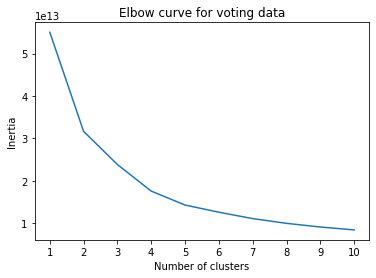

In [32]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for voting data')
plt.show()

In [33]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [34]:
clusters = get_clusters(2, kcluster_data)
clusters

,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State_AK,State_AL,State_AR,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Winner_Republican,class
0,513,39.2,58558,24235.0,50,9.746589,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,2715,43.9,54968,29674.0,488,17.974217,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
2,3370,41.3,44468,22651.0,323,9.584570,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
3,1632,46.7,56771,30786.0,85,5.208333,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4,598,45.9,52250,33227.0,76,12.709030,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90443,17226,35.9,73660,38860.0,1411,8.191106,7,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
90444,9872,36.4,82119,43211.0,478,4.841977,7,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
90445,286,62.3,100755,50354.0,9,3.146853,7,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
90446,122,29.9,75000,24629.0,45,36.885246,7,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [35]:
def show_clusters(df):
    plt.scatter(df['Median Age'], df['Per Capita Income'], c=df['class'])
    plt.xlabel('Median Age')
    plt.ylabel('Per Capita Income')
    plt.show()

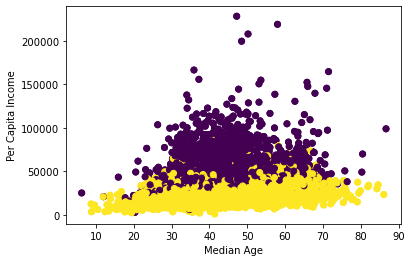

In [36]:
show_clusters(clusters)

# Neural Network Model With State included

In [37]:
cluster_data.head()

,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State_AK,State_AL,State_AR,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Winner_Democrat,Winner_Republican
0,513,39.2,58558,24235.0,50,9.746589,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2715,43.9,54968,29674.0,488,17.974217,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3370,41.3,44468,22651.0,323,9.584570,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1632,46.7,56771,30786.0,85,5.208333,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,598,45.9,52250,33227.0,76,12.709030,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
nn_model = cluster_data[cluster_data['Years Since'] == 7]
X = nn_model.iloc[:,0:7]
X.head()

,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since
0,513,39.2,58558,24235.0,50,9.746589,7
1,2715,43.9,54968,29674.0,488,17.974217,7
2,3370,41.3,44468,22651.0,323,9.584570,7
3,1632,46.7,56771,30786.0,85,5.208333,7
4,598,45.9,52250,33227.0,76,12.709030,7


In [39]:
# Split our preprocessed data into our features and target arrays In this case Republican winner is the target
y = nn_model['Winner_Republican'].values
#X = nn_model.drop(columns=['Winner_Republican','Winner_Democrat'], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

In [40]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 =  8
hidden_nodes_layer2 =  5
hidden_nodes_layer3 =  3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 64        
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
# Create a callback that saves the model's weights every five epochs
import os 
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs('check_points/', exist_ok=True)
path = 'check_points/weights.{epoch:02d}.hdf5'

cp_callback = ModelCheckpoint(filepath = path, save_weights_only = True, save_freq = 5)

In [44]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50, callbacks= [cp_callback])

Epoch 1/50
1437/1437 [==============================] - 5s 3ms/step - loss: 0.6197 - accuracy: 0.6812
Epoch 2/50
1437/1437 [==============================] - 4s 3ms/step - loss: 0.5966 - accuracy: 0.6940
Epoch 3/50
1437/1437 [==============================] - 4s 3ms/step - loss: 0.5898 - accuracy: 0.7010
Epoch 4/50
1437/1437 [==============================] - 4s 3ms/step - loss: 0.5861 - accuracy: 0.7034
Epoch 5/50
1437/1437 [==============================] - 6s 4ms/step - loss: 0.5843 - accuracy: 0.7053
Epoch 6/50
1437/1437 [==============================] - 7s 5ms/step - loss: 0.5833 - accuracy: 0.7055
Epoch 7/50
1437/1437 [==============================] - 5s 4ms/step - loss: 0.5821 - accuracy: 0.7057
Epoch 8/50
1437/1437 [==============================] - 5s 4ms/step - loss: 0.5813 - accuracy: 0.7058
Epoch 9/50
1437/1437 [==============================] - 5s 3ms/step - loss: 0.5809 - accuracy: 0.7052
Epoch 10/50
1437/1437 [==============================] - 5s 4ms/step - loss: 0.580

In [45]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

479/479 - 0s - loss: 0.5806 - accuracy: 0.7005 - 437ms/epoch - 912us/step
Loss: 0.5806027054786682, Accuracy: 0.7005026340484619


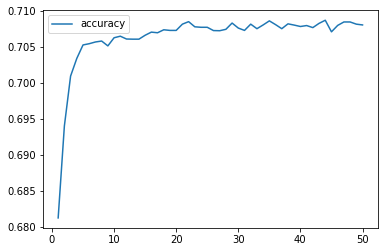

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(fit_model.history)

df.index+=1 

df.plot(y='accuracy')
plt.show()

# Nueral Network prediciton

In [47]:
nn_model = cluster_data[cluster_data['Years Since'] == 3]
X_predict = nn_model.iloc[0:20,0:7]
X_predict.head()

,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since
30637,3543,39.1,30985,13288.0,869,24.527237,3
30638,74296,31.3,54450,23580.0,15853,21.337622,3
30639,4082,26.7,39625,12475.0,1057,25.894170,3
30640,15777,46.9,93264,53375.0,1332,8.442670,3
30641,22596,34.4,42983,10656.0,3911,17.308373,3


In [48]:
nn_target = nn_model.iloc[0:20,59]
nn_target

30637    1.0
30638    0.0
30639    0.0
30640    0.0
30641    0.0
30642    0.0
30643    0.0
30644    1.0
30645    1.0
30646    1.0
30647    1.0
30648    1.0
30649    1.0
30650    1.0
30651    1.0
30652    1.0
30653    1.0
30654    1.0
30655    0.0
30656    0.0
Name: Winner_Republican, dtype: float64

In [49]:
prediction = nn.predict(X_predict)
print("prediction shape:", prediction.shape)
print(prediction)

1/1 [==============================] - 0s 81ms/step
prediction shape: (20, 1)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


# PCA

In [50]:
cluster_data.head()

,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State_AK,State_AL,State_AR,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Winner_Democrat,Winner_Republican
0,513,39.2,58558,24235.0,50,9.746589,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2715,43.9,54968,29674.0,488,17.974217,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3370,41.3,44468,22651.0,323,9.584570,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1632,46.7,56771,30786.0,85,5.208333,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,598,45.9,52250,33227.0,76,12.709030,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
pca_data = cluster_data[cluster_data['Years Since']==7]
#pca_data = pca_data.drop(columns=['Zipcode'],axis=1)
pca_scaled = StandardScaler().fit_transform(pca_data)

In [52]:
# Initialize PCA model for 3 principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=.90)

# Get two principal components for the iris data.
vote_pca = pca.fit_transform(pca_scaled)

In [53]:
# Transform PCA data to a DataFrame
df_pca_data = pd.DataFrame(
    data = vote_pca,
)
df_pca_data.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,1.840858,-0.368272,-1.978677,-0.007329,-0.198424,0.247394,-0.555391,0.475077,-0.643900,0.274661,...,1.902521,0.723788,5.916393,5.035140,-0.517739,-6.978170,-0.346102,-0.487522,-0.330202,0.001548
1,1.775125,-0.203163,-2.086299,-0.365528,-0.055471,0.212899,-0.583501,0.563680,-0.577449,0.283099,...,1.899011,0.728684,5.906280,5.036867,-0.516033,-6.977619,-0.349532,-0.493515,-0.339659,0.006283
2,1.616472,-0.188955,-2.202869,-0.218453,-0.248578,0.288614,-0.560833,0.457975,-0.671963,0.275823,...,1.899211,0.719122,5.921011,5.030171,-0.520501,-6.980796,-0.341378,-0.488182,-0.330653,0.002064
3,2.201159,-0.902919,-1.786957,-0.472120,-0.207747,0.293836,-0.591524,0.481800,-0.660905,0.272298,...,1.893829,0.721663,5.923557,5.028992,-0.521029,-6.979496,-0.345573,-0.487301,-0.334396,0.003835
4,1.987274,-0.653530,-2.011645,-0.462612,-0.095560,0.243153,-0.596025,0.544039,-0.606296,0.277165,...,1.895310,0.726845,5.911708,5.034698,-0.518110,-6.979663,-0.347319,-0.492053,-0.342236,0.007991


In [54]:
# Fetch the explained variance
total = pca.explained_variance_ratio_
sum(total)

0.9151877430453308

# 4 components provide 90% of the infomration in this data set

In [55]:
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca_data)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,3.308556e+06
1,2,3.110523e+06
2,3,3.047872e+06
3,4,2.983514e+06
4,5,2.919876e+06
5,6,2.861188e+06
6,7,2.798672e+06
7,8,2.734260e+06
8,9,2.673542e+06


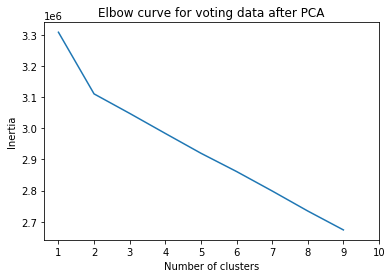

In [56]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for voting data after PCA')
plt.show()

# 

In [57]:
# Get predictions
# predictions = model.predict()
# print(predictions)

# SVM

In [58]:
svm_data = cluster_data[cluster_data['Years Since'] == 7] 
svm_data.head()

,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State_AK,State_AL,State_AR,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Winner_Democrat,Winner_Republican
0,513,39.2,58558,24235.0,50,9.746589,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2715,43.9,54968,29674.0,488,17.974217,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3370,41.3,44468,22651.0,323,9.584570,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1632,46.7,56771,30786.0,85,5.208333,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,598,45.9,52250,33227.0,76,12.709030,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
target = svm_data['Winner_Republican']
target_names = ['Democrat','Republican']

In [60]:
data = svm_data.drop(columns=['Winner_Democrat','Winner_Republican'])
feature_names = data.columns
data.head()

,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State_AK,State_AL,State_AR,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,513,39.2,58558,24235.0,50,9.746589,7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2715,43.9,54968,29674.0,488,17.974217,7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3370,41.3,44468,22651.0,323,9.584570,7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1632,46.7,56771,30786.0,85,5.208333,7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,598,45.9,52250,33227.0,76,12.709030,7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=10)

In [62]:
# Support vector machine rbf classifier
from sklearn.svm import SVC 
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [63]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.690


In [64]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    Democrat       0.69      0.93      0.79      9752
  Republican       0.69      0.26      0.38      5567

    accuracy                           0.69     15319
   macro avg       0.69      0.60      0.59     15319
weighted avg       0.69      0.69      0.64     15319



# Using the model with different data set to see how it performs

In [65]:
# Get new data
test = cluster_data[cluster_data['Years Since'] == 3]
test.head()

,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State_AK,State_AL,State_AR,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Winner_Democrat,Winner_Republican
30637,3543,39.1,30985,13288.0,869,24.527237,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30638,74296,31.3,54450,23580.0,15853,21.337622,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30639,4082,26.7,39625,12475.0,1057,25.894170,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30640,15777,46.9,93264,53375.0,1332,8.442670,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30641,22596,34.4,42983,10656.0,3911,17.308373,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
test_data = test.iloc[0:10,:]
test_data

,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State_AK,State_AL,State_AR,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Winner_Democrat,Winner_Republican
30637,3543,39.1,30985,13288.0,869,24.527237,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30638,74296,31.3,54450,23580.0,15853,21.337622,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30639,4082,26.7,39625,12475.0,1057,25.894170,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30640,15777,46.9,93264,53375.0,1332,8.442670,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30641,22596,34.4,42983,10656.0,3911,17.308373,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30642,8957,50.5,48778,35838.0,1242,13.866250,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30643,9823,46.2,56017,30155.0,1663,16.929655,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30644,963,31.3,46875,21647.0,210,21.806854,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30645,744,45.8,47262,29896.0,93,12.500000,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30646,1942,38.9,59201,29047.0,165,8.496395,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [67]:
target = test_data['Winner_Republican']
target_names = ['Democrat', 'Republican']

In [68]:
print(target)

30637    1.0
30638    0.0
30639    0.0
30640    0.0
30641    0.0
30642    0.0
30643    0.0
30644    1.0
30645    1.0
30646    1.0
Name: Winner_Republican, dtype: float64


In [69]:
data = test_data.drop(columns=['Winner_Democrat','Winner_Republican'], axis=1)
data

,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State_AK,State_AL,State_AR,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
30637,3543,39.1,30985,13288.0,869,24.527237,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30638,74296,31.3,54450,23580.0,15853,21.337622,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30639,4082,26.7,39625,12475.0,1057,25.894170,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30640,15777,46.9,93264,53375.0,1332,8.442670,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30641,22596,34.4,42983,10656.0,3911,17.308373,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30642,8957,50.5,48778,35838.0,1242,13.866250,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30643,9823,46.2,56017,30155.0,1663,16.929655,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30644,963,31.3,46875,21647.0,210,21.806854,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30645,744,45.8,47262,29896.0,93,12.500000,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30646,1942,38.9,59201,29047.0,165,8.496395,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
predictions = model.predict(data)
print(predictions)

[0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
